In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.stats as stats

def sample_state(n, theta):
    return math.binomial(n, theta)

def plot_prob_dist(x, pdf, label, color='royalblue', linewidth=2, fill_alpha=0.3):
    plt.figure(figsize=(8, 5))

    # Plot the PDF
    plt.plot(x, pdf, label=label, color=color, linewidth=linewidth)

    # Fill area under the curve
    plt.fill_between(x, pdf, color=color, alpha=fill_alpha)
    
    # Background and grid
    plt.gca().set_facecolor('#f9f9f9')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Titles and labels
    plt.title("Probability Density Function", fontsize=14, weight='bold')
    plt.xlabel("x", fontsize=12)
    plt.ylabel("Probability Density", fontsize=12)

    # Legend
    plt.legend(fontsize=11, frameon=True, fancybox=True, shadow=True)

    # Auto-range with padding
    x_padding = (x.max() - x.min()) * 0.05
    y_padding = (pdf.max() - pdf.min()) * 0.1 if (pdf.max() - pdf.min()) > 0 else 0.1

    plt.xlim(x.min() - x_padding, x.max() + x_padding)
    print(y_padding)
    plt.ylim(0, pdf.max() + y_padding)

    # Layout
    plt.tight_layout()
    plt.show()
    
def plot_discrete_prob_dist(x, pmf, label, color='indigo', markerfmt='o', basefmt=" "):
    plt.figure(figsize=(8, 5))

    # Stem plot without invalid format string
    markerline, stemlines, baseline = plt.stem(x, pmf, label=label, basefmt=basefmt, markerfmt=markerfmt)

    # Style markers and lines directly
    plt.setp(markerline, color=color, markersize=6)
    plt.setp(stemlines, color=color, linewidth=2)
    plt.setp(baseline, color='gray', linewidth=1, alpha=0.5)

    # Background and grid
    plt.gca().set_facecolor('#f9f9f9')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Titles and labels
    plt.title("Probability Mass Function", fontsize=14, weight='bold')
    plt.xlabel("x", fontsize=12)
    plt.ylabel("Probability", fontsize=12)

    # Legend
    plt.legend(fontsize=11, frameon=True, fancybox=True, shadow=True)

    # Smart limits with padding
    x_padding = (max(x) - min(x)) * 0.1 if len(x) > 1 else 1
    y_padding = (max(pmf) - min(pmf)) * 0.2 if max(pmf) > 0 else 0.1

    plt.xlim(min(x) - x_padding, max(x) + x_padding)
    plt.ylim(0, max(pmf) + y_padding)

    plt.tight_layout()
    plt.show()


0.1


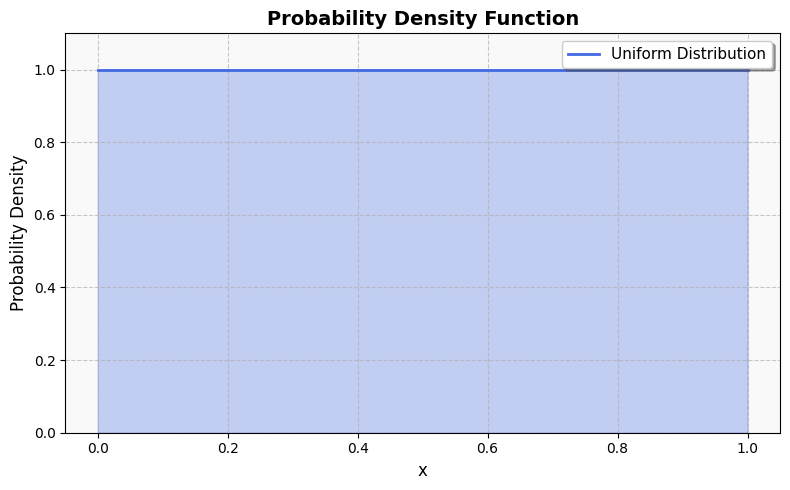

In [3]:
real_theta = 0.5
x = np.linspace(0, 1, 1000)
pdf = stats.uniform(0, 1).pdf(x)
plot_prob_dist(x, pdf, "Uniform Distribution")

In [4]:
def create_all_utterances(min_interval, max_interval, domain):
    min_val, max_val = domain
    domain_range = max_val - min_val + 1
    if min_interval < 1 or max_interval > domain_range or min_interval >= max_interval:
        raise ValueError("Interval out of bounds of the domain.")
    utterances = []
    for interval_range in range(min_interval, max_interval + 1):
        for start in range(min_val, max_val + 1):
            end = start + interval_range - 1
            if end <= max_val:
                utterances.append((start, end))
                
    return utterances

print(create_all_utterances(1, 3, (0, 10)))

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10)]


In [5]:
def literal_listener(utterance, domain):
    min_val, max_val = domain
    start, end = utterance
    if start < min_val or end > max_val or start >= end:
        raise ValueError("Utterance out of bounds of the domain.")
    x = np.arange(min_val, max_val + 1)
    pmf = np.zeros(len(x))
    pmf[start: end + 1] = 1 / (end - start + 1)
    return (x, pmf)

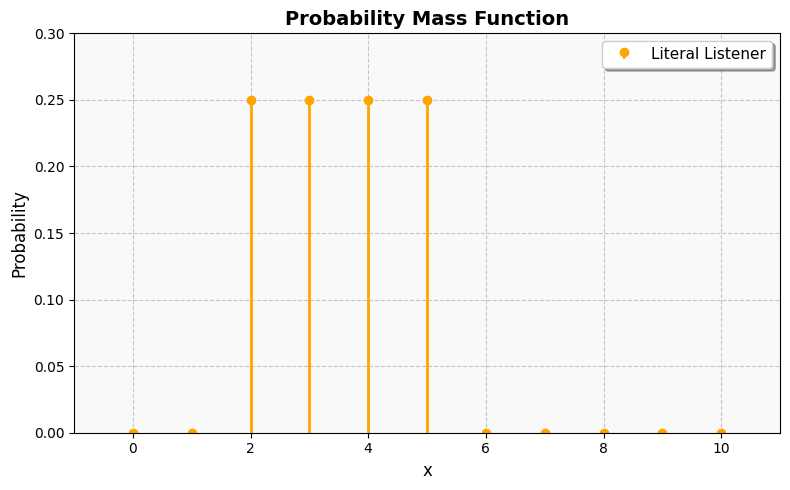

In [6]:
plot_discrete_prob_dist(*literal_listener((2, 5), (0, 10)), "Literal Listener", color='orange')

In [7]:
min_interval = 2
max_interval = 4
domain = (0, 10)


utterances = create_all_utterances(min_interval, max_interval, domain)
entropies = {}
for utterance in utterances:
    x, pmf = literal_listener(utterance, domain)
    pmf = pmf[pmf > 0]  # Filter out zero probabilities
    entropy = -np.sum(pmf * np.log2(pmf))
    entropies[utterance] = entropy
    
print("Utterances and their entropies:")
for utterance, entropy in entropies.items():
    print(f"Utterance {utterance}: Entropy = {entropy:.4f}")

Utterances and their entropies:
Utterance (0, 1): Entropy = 1.0000
Utterance (1, 2): Entropy = 1.0000
Utterance (2, 3): Entropy = 1.0000
Utterance (3, 4): Entropy = 1.0000
Utterance (4, 5): Entropy = 1.0000
Utterance (5, 6): Entropy = 1.0000
Utterance (6, 7): Entropy = 1.0000
Utterance (7, 8): Entropy = 1.0000
Utterance (8, 9): Entropy = 1.0000
Utterance (9, 10): Entropy = 1.0000
Utterance (0, 2): Entropy = 1.5850
Utterance (1, 3): Entropy = 1.5850
Utterance (2, 4): Entropy = 1.5850
Utterance (3, 5): Entropy = 1.5850
Utterance (4, 6): Entropy = 1.5850
Utterance (5, 7): Entropy = 1.5850
Utterance (6, 8): Entropy = 1.5850
Utterance (7, 9): Entropy = 1.5850
Utterance (8, 10): Entropy = 1.5850
Utterance (0, 3): Entropy = 2.0000
Utterance (1, 4): Entropy = 2.0000
Utterance (2, 5): Entropy = 2.0000
Utterance (3, 6): Entropy = 2.0000
Utterance (4, 7): Entropy = 2.0000
Utterance (5, 8): Entropy = 2.0000
Utterance (6, 9): Entropy = 2.0000
Utterance (7, 10): Entropy = 2.0000


In [8]:
def truncated_normal(mean, std, min_x, max_x):
    # Convert bounds to standardized space (Z-scores)
    a, b = (min_x - mean) / std, (max_x - mean) / std

    # Create the truncated normal distribution
    dist = stats.truncnorm(a, b, loc=mean, scale=std)
    return dist

0.09655229758843265


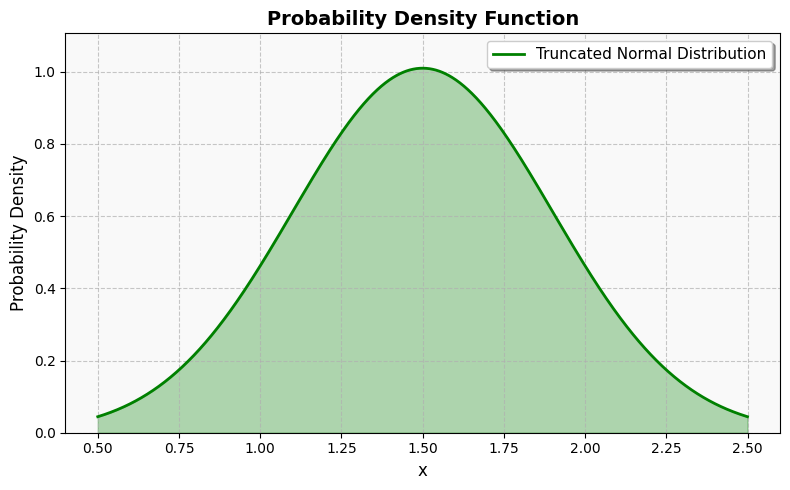

In [9]:
min_value = 0.5
max_value = 2.5
mean = 1.5
std = 0.4
x = np.linspace(min_value, max_value, 1000)
pdf = truncated_normal(mean, std, min_value, max_value).pdf(x)
plot_prob_dist(x, pdf, "Truncated Normal Distribution", color='green')

In [10]:
def literal_speaker(state, utterances, domain):
    probs = []
    for utterance in utterances:
        if utterance[0] <= state <= utterance[1]:
            probs.append(1.0)
        else:
            probs.append(0.0)
    probs = np.array(probs)
    probs /= np.sum(probs) if np.sum(probs) > 0 else 1.0
    result = {utt: prob for utt, prob in zip(utterances, probs)}
    return result

def informativeness_all_utterances(state, utterances, domain):

    result = {}
    for utt in utterances:
        x, pmf = literal_listener(utt, domain)
        result[utt] = pmf[np.where(x == state)[0][0]]
    return result

def persuasiveness_all_utterances(pers, utterances, domain):
        
    result = {u: 0.0 for u in utterances}

    for utt in utterances:
        if pers == "inf":
            result[utt] = 1
        else:
            x, pmf = literal_listener(utt, domain)
            for i in range(len(pmf)):
                result[utt] += x[i] * pmf[i]
            result[utt] = (result[utt] - domain[0] + 1)/ (domain[1] - domain[0] + 1)
            if pers == "low":
                result[utt] = 1 - result[utt]
    return result

def pragmatic_speaker(state, pers, utterances, domain, alpha=1.0):
    # Compute informativeness and persuasiveness
    informativeness = informativeness_all_utterances(state, utterances, domain)
    persuasiveness = persuasiveness_all_utterances(pers, utterances, domain)

    if pers == "inf":
        beta = 1.0
    else:
        beta = 0.0
    # Compute softmax weights
    scores = []
    for utt in utterances:
        info = informativeness.get(utt, 0.0)
        pers_val = persuasiveness.get(utt, 0.0)

        if info > 0:
            score = (info ** (alpha * beta)) * (pers_val ** (alpha * (1 - beta)))
        else:
            score = 0.0
        scores.append(score)

    scores = np.array(scores)
    probs = scores / np.sum(scores) if np.sum(scores) > 0 else np.ones_like(scores) / len(scores)
    return {utt: p for utt, p in zip(utterances, probs)}


In [45]:
min_interval = 3
max_interval = 5
domain = (0, 20)


utterances = create_all_utterances(min_interval, max_interval, domain)
persusaviness = persuasiveness_all_utterances("high", utterances, domain)
#print("Persuasiveness of utterances:")
# for utt, pers in persusaviness.items():
#     print(f"Utterance {utt}: Persuasiveness = {pers:.4f}")



pragmatic_speaker_p = pragmatic_speaker(5, "high", utterances, domain, alpha=3.0)
print("Pragmatic Speaker Probabilities:")
for utt, prob in pragmatic_speaker_p.items():
    print(f"Utterance {utt}: Probability = {prob:.4f}")

Pragmatic Speaker Probabilities:
Utterance (0, 2): Probability = 0.0000
Utterance (1, 3): Probability = 0.0000
Utterance (2, 4): Probability = 0.0000
Utterance (3, 5): Probability = 0.0431
Utterance (4, 6): Probability = 0.0745
Utterance (5, 7): Probability = 0.1184
Utterance (6, 8): Probability = 0.0000
Utterance (7, 9): Probability = 0.0000
Utterance (8, 10): Probability = 0.0000
Utterance (9, 11): Probability = 0.0000
Utterance (10, 12): Probability = 0.0000
Utterance (11, 13): Probability = 0.0000
Utterance (12, 14): Probability = 0.0000
Utterance (13, 15): Probability = 0.0000
Utterance (14, 16): Probability = 0.0000
Utterance (15, 17): Probability = 0.0000
Utterance (16, 18): Probability = 0.0000
Utterance (17, 19): Probability = 0.0000
Utterance (18, 20): Probability = 0.0000
Utterance (0, 3): Probability = 0.0000
Utterance (1, 4): Probability = 0.0000
Utterance (2, 5): Probability = 0.0314
Utterance (3, 6): Probability = 0.0574
Utterance (4, 7): Probability = 0.0948
Utterance (

In [56]:
def pragmatic_listener_paper(utt, utterances, domain, alpha=3.0):
    state_prior = 1.0 / (domain[1] - domain[0] + 1)
    psi_prior = 1 / 3
    result = {}
    # inf case
    all_states = np.arange(domain[0], domain[1] + 1)
    for state in all_states:
        res_inf = pragmatic_speaker(state, "inf", utterances, domain, alpha=alpha)[utt]
        res_high = pragmatic_speaker(state, "high", utterances, domain, alpha=alpha)[utt]
        res_low = pragmatic_speaker(state, "low", utterances, domain, alpha=alpha)[utt]
        result["inf", state] = res_inf * state_prior * psi_prior
        result["high", state] = res_high * state_prior * psi_prior
        result["low", state] = res_low * state_prior * psi_prior
    # Normalize
    total_prob = sum(result.values())
    result = {k: v / total_prob for k, v in result.items()}

    return result

def pragmatic_listener_state(joint):
    x, pmf = [], []
    state_probs = {}
    for (psi, state), prob in joint.items():
        state_probs[state] = state_probs.get(state, 0.0) + prob
    for state, prob in state_probs.items():
        x.append(state)
        pmf.append(prob)
    return (x, pmf)

def pragmatic_listener_psi(joint):
    x, pmf = [], []
    psi_probs = {}
    for (psi, state), prob in joint.items():
        psi_probs[psi] = psi_probs.get(psi, 0.0) + prob
    for psi, prob in psi_probs.items():
        x.append(psi)
        pmf.append(prob)
    return (x, pmf)


In [ ]:
def pragmatic_listener_my(utt, utterances, domain, psi_prior, belief alpha=3.0):
    state_prior = 1.0 / (domain[1] - domain[0] + 1)
    psi_prior = 1 / 3
    result = {}
    # inf case
    all_states = np.arange(domain[0], domain[1] + 1)
    for state in all_states:
        res_inf = pragmatic_speaker(state, "inf", utterances, domain, alpha=alpha)[utt]
        res_high = pragmatic_speaker(state, "high", utterances, domain, alpha=alpha)[utt]
        res_low = pragmatic_speaker(state, "low", utterances, domain, alpha=alpha)[utt]
        result["inf", state] = res_inf * state_prior * psi_prior
        result["high", state] = res_high * state_prior * psi_prior
        result["low", state] = res_low * state_prior * psi_prior
    # Normalize
    total_prob = sum(result.values())
    result = {k: v / total_prob for k, v in result.items()}

    return result

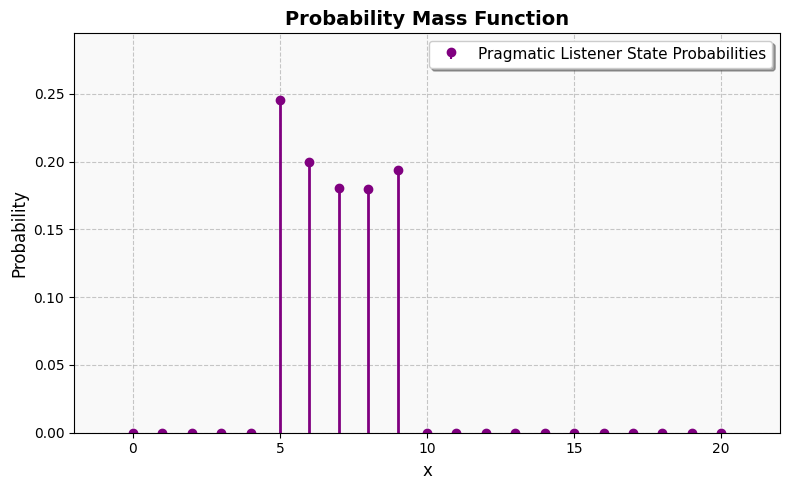

TypeError: unsupported operand type(s) for -: 'str' and 'str'

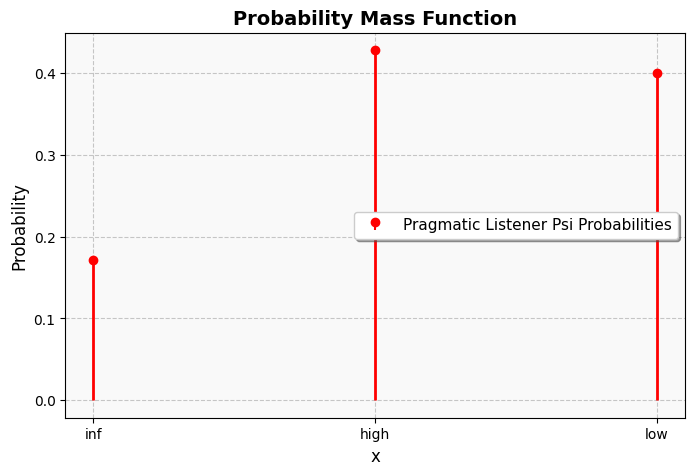

In [57]:
pragmatic_listener_paper_joint = pragmatic_listener_paper((5, 9), utterances, domain, alpha=3.0)
x_state, pmf_state = pragmatic_listener_state(pragmatic_listener_paper_joint)
x_psi, pmf_psi = pragmatic_listener_psi(pragmatic_listener_paper_joint)
plot_discrete_prob_dist(x_state, pmf_state, "Pragmatic Listener State Probabilities", color='purple', markerfmt='o')
plot_discrete_prob_dist(x_psi, pmf_psi, "Pragmatic Listener Psi Probabilities", color='red', markerfmt='o')

# print("Pragmatic Listener Joint Probabilities:")
# for (psi, theta), prob in pragmatic_listener_paper_joint.items():
#     print(f"Psi {psi}, State {theta}: Probability = {prob:.4f}")
    

# print("Pragmatic Listener Theta Probabilities:")
# for state, prob in pragmatic_listener_paper_theta.items(): 
#     print(f"State {state}: Probability = {prob:.4f}")
    
# pragmatic_listener_paper_psi = pragmatic_listener_psi(pragmatic_listener_paper_joint)
# print("Pragmatic Listener Psi Probabilities:")
# for psi, prob in pragmatic_listener_paper_psi.items():
#     print(f"Psi {psi}: Probability = {prob:.4f}")
